In [235]:
from kan import *
import torch
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm
from pyscf import gto, scf
from collections import Counter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

In [241]:
# Total number of electrons
total_electrons = 1
total_electrons

NUM_ELECTRONS = total_electrons
INPUT_DIM = NUM_ELECTRONS
OUTPUT_DIM = NUM_ELECTRONS


# Create MultKAN model with specified widths
# Create the initial MultKAN model
model = MultKAN(width=[2,[0,1]], grid=5, k=3, seed=42, mult_arity=2)
#model = KAN(width=[1,1], grid=5, k=3, seed=0)

# Create dataset
f = lambda x: (1 / torch.sqrt(torch.tensor(32.0 * torch.pi))) * x[:,[0]] * torch.exp((-1/2) * x[:,[0]]) * torch.cos(x[:,[1]] * torch.pi/20)
dataset = create_dataset(f, n_var=2, ranges=[0,20], train_num=10000)
print("Dataset shapes:", dataset['train_input'].shape, dataset['train_label'].shape)

checkpoint directory created: ./model
saving model version 0.0
Dataset shapes: torch.Size([10000, 2]) torch.Size([10000, 1])


In [237]:
# plt.figure(figsize=(10, 6))
# x = dataset['train_input'][:,0]
# # x = np.arange(dataset['train_input'][:,0].shape[0])
# y = dataset['train_label']
# plt.scatter(x, y, alpha=0.5, s=1)
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.show()

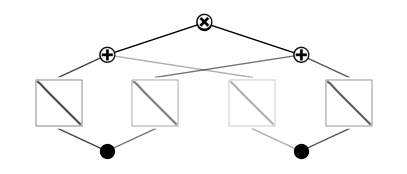

In [242]:
model(dataset['train_input'])
model.plot(beta=1)

saving model version 0.1


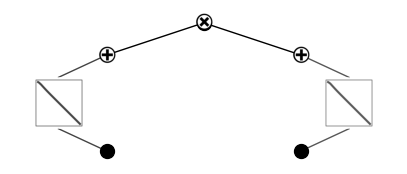

In [243]:
model.module(0, '[1]->[1]')
#model.fix_symbolic(1,0,0, '0',fit_params_bool=False)
model.plot(beta=1)

In [244]:
model.fit(dataset, steps=100)#, lamb=0.001)

| train_loss: 6.82e-04 | test_loss: 6.86e-04 | reg: 1.21e+00 | : 100%|█| 100/100 [00:14<00:00,  6.99

saving model version 0.2


{'train_loss': [array(0.02189185, dtype=float32),
  array(0.0217612, dtype=float32),
  array(0.02174388, dtype=float32),
  array(0.01419471, dtype=float32),
  array(0.00756595, dtype=float32),
  array(0.00585808, dtype=float32),
  array(0.00499121, dtype=float32),
  array(0.00496335, dtype=float32),
  array(0.00479199, dtype=float32),
  array(0.00478475, dtype=float32),
  array(0.00471143, dtype=float32),
  array(0.00457953, dtype=float32),
  array(0.00455677, dtype=float32),
  array(0.00455106, dtype=float32),
  array(0.00451489, dtype=float32),
  array(0.00449042, dtype=float32),
  array(0.00340222, dtype=float32),
  array(0.00306436, dtype=float32),
  array(0.00295981, dtype=float32),
  array(0.00290883, dtype=float32),
  array(0.00287167, dtype=float32),
  array(0.00251553, dtype=float32),
  array(0.00237436, dtype=float32),
  array(0.00224022, dtype=float32),
  array(0.00221195, dtype=float32),
  array(0.00218993, dtype=float32),
  array(0.00217034, dtype=float32),
  array(0.00208

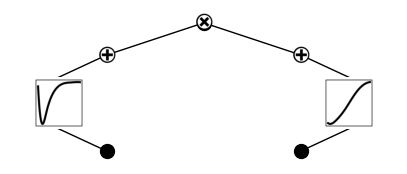

In [245]:
model.plot(beta=100)

In [246]:
grids = np.array([3,10,20])

train_losses = []
test_losses = []
steps = 50

for i in range(grids.shape[0]):
        model = model.refine(grids[i])
        results = model.fit(dataset, opt="LBFGS", steps=steps)
        train_losses += results['train_loss']
        test_losses += results['test_loss']

saving model version 0.3


| train_loss: 4.72e-04 | test_loss: 4.85e-04 | reg: 1.31e+00 | : 100%|█| 50/50 [00:04<00:00, 12.39it


saving model version 0.4
saving model version 0.5


| train_loss: 1.17e-04 | test_loss: 1.20e-04 | reg: 1.30e+00 | : 100%|█| 50/50 [00:05<00:00,  9.61it


saving model version 0.6
saving model version 0.7


| train_loss: 5.42e-05 | test_loss: 5.48e-05 | reg: 1.30e+00 | : 100%|█| 50/50 [00:06<00:00,  7.23it

saving model version 0.8


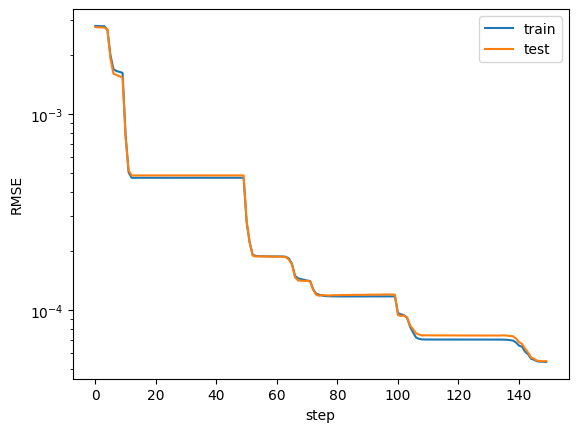

In [247]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

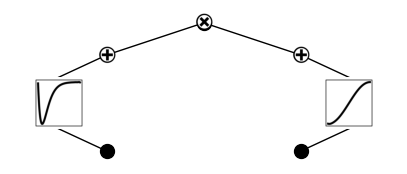

In [248]:
model.plot()

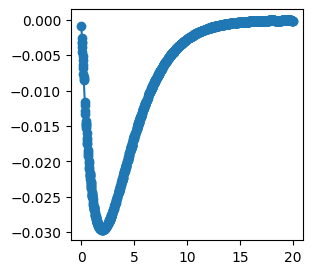

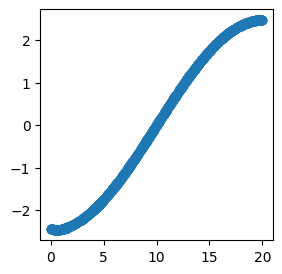

In [255]:
function_1 = np.array(model.get_fun(0,0,0))
function_2 = np.array(model.get_fun(0,1,1))

In [256]:
total_fun1 = function_1[0]
total_fun2 = function_1[1] * function_2[1]

In [210]:
model.unfix_symbolic_all()

saving model version 0.9
saving model version 0.10
saving model version 0.11
saving model version 0.12
saving model version 0.13


In [211]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,1,'x')
    model.fix_symbolic(0,0,1,'exp')
elif mode == "auto":
    # automatic mode
    #lib = ['x','exp', 'x^2']
    model.auto_symbolic()

fixing (0,0,0) with x^2, r2=0.999930202960968, c=2
fixing (0,0,1) with x^2, r2=0.9999594688415527, c=2
fixing (0,1,0) with x^2, r2=0.9983490109443665, c=2
fixing (0,1,1) with x^2, r2=0.9967498183250427, c=2
fixing (1,0,0) with 1/x^2, r2=0.9999806880950928, c=2
saving model version 0.14


In [212]:
sf = model.symbolic_formula()[0][0]

In [213]:
nsimplify(ex_round(ex_round(sf, 3),3))

127/747 - 2/(59*(-((1 - 488*x_1/607)**2/12 + (-x_2 - 1/1024)**2/36 - 303/527)*(55*(1 - 113*x_1/391)**2/193 - (-x_2 - 1/1024)**2/45 - 341/512) - 158/603)**2)

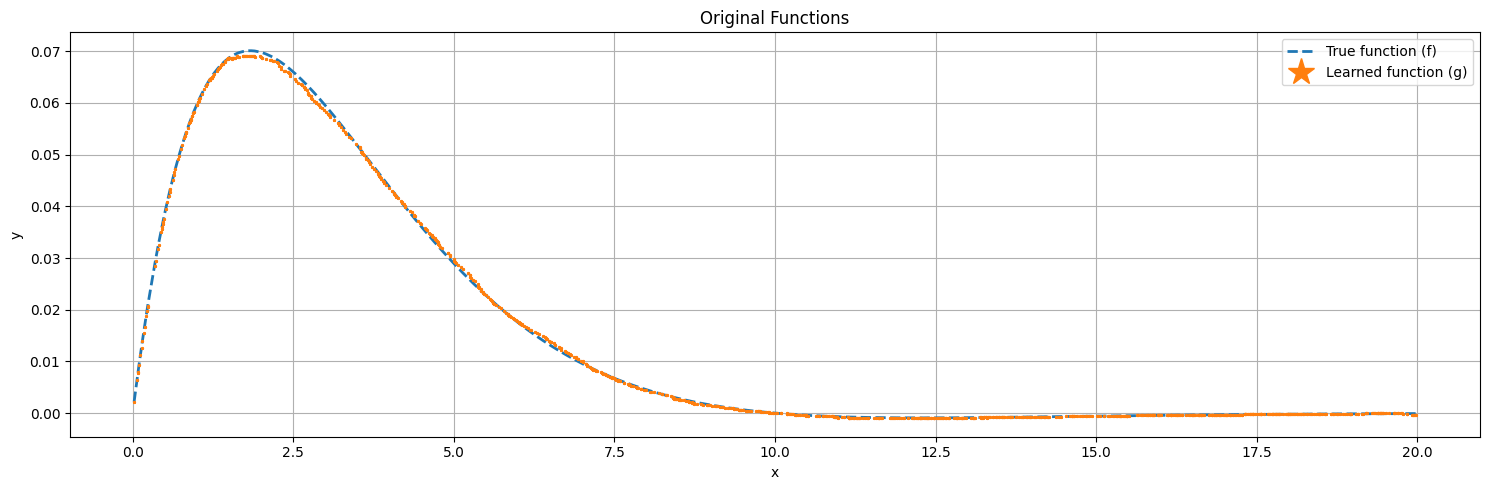

In [258]:
x = total_fun1.reshape(-1, 1)
y = total_fun1.reshape(-1, 1)

f =  (1 / np.sqrt(32 * np.pi)) * x * np.exp((-1/2) * x) * np.cos(x * np.pi / 20)
g = total_fun2.reshape(-1, 1)

# Create subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5))

# Regular functions plot
ax1.plot(x, f, '--', label='True function (f)', linewidth=2)
ax1.plot(x, g, '*', label='Learned function (g)', linewidth=1, markersize=2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Functions')
ax1.legend(markerscale=10)
ax1.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# mse = np.mean((f - g) ** 2)
# print(f"Mean Squared Error: {mse:.10f}")